# Identification of Criminal Activity Hotspots using Machine Learning to aid in Effective Utilization of Police Patrolling in Cities with High Crime Rates - *Source Code Notebook*

#### Source of Data
* [Dataset Link](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data)
* All records taken from 19 Jan 2012 - 05 May 2024

In [4]:
# Loading the necessary libraries

import pandas as pd
import sys
sys.path.append("../utils/")
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns

import util_script as us

## Data Acquisition - Obtain Data

In [5]:
'''Let's write code to automate the creating of our dataset'''

DATA_PATH = "../data/"

file_names = ['crimes_2019.csv','Crimes_2021.csv','Crimes_2022.csv','Crimes_2023.csv','Crimes_2024.csv']
file_names = [DATA_PATH + x for x in file_names]

main_df = us.create_df(file_names)
orig_shape = main_df.shape
print("The Number of Crimes: " + str(main_df.shape[0]))
print("\nThe Columns: " + str(main_df.shape[1]))


Loading Chicago Crime Dataset file for the year 2019.
Finished loading Chicago Crime Dataset file for the year 2019.
Loading Chicago Crime Dataset file for the year 2021.
Finished loading Chicago Crime Dataset file for the year 2021.
Loading Chicago Crime Dataset file for the year 2022.
Finished loading Chicago Crime Dataset file for the year 2022.
Loading Chicago Crime Dataset file for the year 2023.
Finished loading Chicago Crime Dataset file for the year 2023.
Loading Chicago Crime Dataset file for the year 2024.
Finished loading Chicago Crime Dataset file for the year 2024.
All data files loaded onto the Main Dataframe.


The Number of Crimes: 883085

The Columns: 22


In [6]:
# Information about the main dataframe
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883085 entries, 0 to 883084
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    883085 non-null  int64  
 1   Case Number           883085 non-null  object 
 2   Date                  883085 non-null  object 
 3   Block                 883085 non-null  object 
 4   IUCR                  883085 non-null  object 
 5   Primary Type          883085 non-null  object 
 6   Description           883085 non-null  object 
 7   Location Description  878909 non-null  object 
 8   Arrest                883085 non-null  bool   
 9   Domestic              883085 non-null  bool   
 10  Beat                  883085 non-null  int64  
 11  District              883085 non-null  int64  
 12  Ward                  883058 non-null  float64
 13  Community Area        883085 non-null  int64  
 14  FBI Code              883085 non-null  object 
 15  

<Axes: >

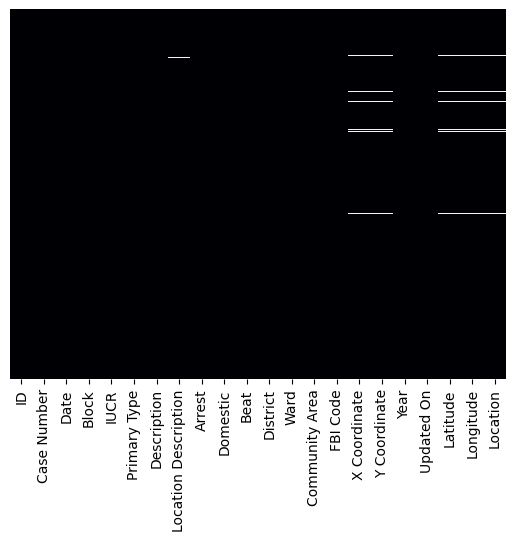

In [7]:
# Visualizing Missing Values
sns.heatmap(data = main_df.isna(), yticklabels=False, cbar=False, cmap='inferno')

In [8]:
# To drop the rows with missing data
main_df = main_df.dropna()
main_df.isna().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

The above dropping of rows does not cause too much of data loss as shown below :

In [9]:
# Inspecting the loss of data after such cleaning
print("Data Retained after Cleaning:",round(((main_df.shape[0]/orig_shape[0]) * 100),2),"%")

Data Retained after Cleaning: 98.26 %


In [10]:
# What are the features of our dataset?
print(main_df.columns)

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


## Data Cleaning - Scrub Data

In [11]:
import pandas as pd

# Example time_convert function
def time_convert(date_str):
    from datetime import datetime
    try:
        return datetime.strptime(date_str, "%m/%d/%Y %I:%M:%S %p")
    except ValueError:
        return None  # or some default value

# Inspect the 'Date' column for any improper data
print(main_df['Date'].head())

# Clean the 'Date' column
main_df = main_df[main_df['Date'].notnull()]  # Remove rows where 'Date' is null
main_df['Date'] = main_df['Date'].apply(lambda x: x.strip() if isinstance(x, str) else x)  # Strip whitespace

# Remove rows with empty 'Date' strings
main_df = main_df[main_df['Date'] != '']

# Apply the time_convert function with additional error handling
main_df['Date'] = main_df['Date'].apply(time_convert)

# Verify the transformation
print(main_df['Date'].head())


0    05/03/2019 11:40:00 PM
1    05/03/2019 11:33:00 PM
2    05/03/2019 11:30:00 PM
3    05/03/2019 11:30:00 PM
4    05/03/2019 11:25:00 PM
Name: Date, dtype: object
0   2019-05-03 23:40:00
1   2019-05-03 23:33:00
2   2019-05-03 23:30:00
3   2019-05-03 23:30:00
4   2019-05-03 23:25:00
Name: Date, dtype: datetime64[ns]


In [12]:
main_df = main_df[main_df['Date'].notnull()]  # Remove rows where 'Date' is null
main_df['Date'] = main_df['Date'].apply(lambda x: x.strip() if isinstance(x, str) else x)  # Strip whitespace
main_df


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11675533,JC248984,2019-05-03 23:40:00,027XX W NORTH AVE,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,STREET,True,False,...,1.0,24,18,1157682.0,1910520.0,2019,05/10/2019 04:20:42 PM,41.910225,-87.696173,"(41.910224908, -87.696172663)"
1,11675453,JC248966,2019-05-03 23:33:00,051XX W MADISON ST,1330,CRIMINAL TRESPASS,TO LAND,PARKING LOT/GARAGE(NON.RESID.),True,False,...,28.0,25,26,1142285.0,1899542.0,2019,05/10/2019 04:20:42 PM,41.880400,-87.753009,"(41.880399914, -87.753008553)"
2,11675494,JC248999,2019-05-03 23:30:00,011XX W LAWRENCE AVE,0810,THEFT,OVER $500,MOVIE HOUSE/THEATER,False,False,...,46.0,3,06,1167886.0,1932034.0,2019,05/10/2019 04:20:42 PM,41.969046,-87.658065,"(41.969046206, -87.658064717)"
3,11675481,JC248956,2019-05-03 23:30:00,121XX S HARVARD AVE,0810,THEFT,OVER $500,RESIDENTIAL YARD (FRONT/BACK),False,False,...,34.0,53,06,1176145.0,1824335.0,2019,05/10/2019 04:20:42 PM,41.673328,-87.630934,"(41.67332819, -87.630934077)"
4,11675910,JC248965,2019-05-03 23:25:00,025XX N MILWAUKEE AVE,5011,OTHER OFFENSE,LICENSE VIOLATION,BAR OR TAVERN,False,False,...,32.0,22,26,1155343.0,1916744.0,2019,05/10/2019 04:20:42 PM,41.927351,-87.704598,"(41.92735143, -87.704597631)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883079,13357447,JH138928,2024-01-01 00:00:00,070XX S PEORIA ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,16.0,68,06,1171521.0,1858140.0,2024,02/06/2024 03:41:05 PM,41.766196,-87.646872,POINT (-87.6468717 41.766196218)
883081,13448420,JH248672,2024-01-01 00:00:00,013XX N CLEVELAND AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,2.0,8,11,1172739.0,1909478.0,2024,05/05/2024 03:45:58 PM,41.907045,-87.640890,POINT (-87.640890365 41.907045359)
883082,13424734,JH219818,2024-01-01 00:00:00,104XX S NORMAL AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,49,11,1174802.0,1835695.0,2024,04/12/2024 03:41:46 PM,41.704532,-87.635513,POINT (-87.635512737 41.704531711)
883083,13352771,JH130381,2024-01-01 00:00:00,051XX N DAMEN AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,VEHICLE NON-COMMERCIAL,False,False,...,40.0,4,02,1162074.0,1934195.0,2024,03/08/2024 03:40:10 PM,41.975100,-87.679375,POINT (-87.679374655 41.975099794)


In [13]:
""" Feature Engineering - Splitting the 'Date' feature into more suitable features for a Time-based analysis"""

# Feature Engineering 1 : Month
def month_col(x):
    return int(x.strftime("%m"))
main_df['Month'] = main_df['Date'].apply(month_col)

# Feature Engineering 2 : Day
def day_col(x):
    return int(x.strftime("%w"))
main_df['Day'] = main_df['Date'].apply(day_col)  

# Feature Engineering 3 : Hour
def hour_col(x):
    return int(x.strftime("%H"))
main_df['Hour'] = main_df['Date'].apply(hour_col)

In [14]:
# Inspect the latest version of the dataset
#remove district greater than 25
main_df = main_df[main_df['District'] <= 25]
main_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour
0,11675533,JC248984,2019-05-03 23:40:00,027XX W NORTH AVE,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,STREET,True,False,...,1157682.0,1910520.0,2019,05/10/2019 04:20:42 PM,41.910225,-87.696173,"(41.910224908, -87.696172663)",5,5,23
1,11675453,JC248966,2019-05-03 23:33:00,051XX W MADISON ST,1330,CRIMINAL TRESPASS,TO LAND,PARKING LOT/GARAGE(NON.RESID.),True,False,...,1142285.0,1899542.0,2019,05/10/2019 04:20:42 PM,41.880400,-87.753009,"(41.880399914, -87.753008553)",5,5,23
2,11675494,JC248999,2019-05-03 23:30:00,011XX W LAWRENCE AVE,0810,THEFT,OVER $500,MOVIE HOUSE/THEATER,False,False,...,1167886.0,1932034.0,2019,05/10/2019 04:20:42 PM,41.969046,-87.658065,"(41.969046206, -87.658064717)",5,5,23
3,11675481,JC248956,2019-05-03 23:30:00,121XX S HARVARD AVE,0810,THEFT,OVER $500,RESIDENTIAL YARD (FRONT/BACK),False,False,...,1176145.0,1824335.0,2019,05/10/2019 04:20:42 PM,41.673328,-87.630934,"(41.67332819, -87.630934077)",5,5,23
4,11675910,JC248965,2019-05-03 23:25:00,025XX N MILWAUKEE AVE,5011,OTHER OFFENSE,LICENSE VIOLATION,BAR OR TAVERN,False,False,...,1155343.0,1916744.0,2019,05/10/2019 04:20:42 PM,41.927351,-87.704598,"(41.92735143, -87.704597631)",5,5,23


In [15]:
# Get top 10 primary crime types
top_12 = list(main_df['Primary Type'].value_counts().head(12).index)

def filter_top_12(df):
    # Filter the DataFrame for each top crime and collect them in a list
    filtered_list = [df[df['Primary Type'] == crime] for crime in top_12]
    
    # Concatenate all the filtered DataFrames
    df2 = pd.concat(filtered_list, ignore_index=True)
    
    return df2

# Filter the DataFrame to only include the top 12 crimes
df2 = filter_top_12(main_df)

# Display the shape of the filtered DataFrame
df2.shape

(736843, 25)

In [16]:
df2.shape[0]/main_df.shape[0] * 100

96.43506848741366

**NOTE :**
Even though only the Top 10 crimes have been picked up from thw hole dataset, we see that we still have been able to retain 79.7% of all crime records. This shows how dominating these 10 crimes have been in th crime landscape of Chicago.

In [17]:
df2.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour
0,11675494,JC248999,2019-05-03 23:30:00,011XX W LAWRENCE AVE,0810,THEFT,OVER $500,MOVIE HOUSE/THEATER,False,False,...,1167886.0,1932034.0,2019,05/10/2019 04:20:42 PM,41.969046,-87.658065,"(41.969046206, -87.658064717)",5,5,23
1,11675481,JC248956,2019-05-03 23:30:00,121XX S HARVARD AVE,0810,THEFT,OVER $500,RESIDENTIAL YARD (FRONT/BACK),False,False,...,1176145.0,1824335.0,2019,05/10/2019 04:20:42 PM,41.673328,-87.630934,"(41.67332819, -87.630934077)",5,5,23
2,11675513,JC248946,2019-05-03 23:11:00,066XX W GRAND AVE,0810,THEFT,OVER $500,RESTAURANT,True,False,...,1131423.0,1915221.0,2019,05/10/2019 04:20:42 PM,41.923620,-87.792530,"(41.923619797, -87.792530495)",5,5,23
3,11675615,JC249145,2019-05-03 23:00:00,079XX S ST LAWRENCE AVE,0820,THEFT,$500 AND UNDER,RESIDENCE-GARAGE,False,False,...,1181614.0,1852408.0,2019,05/10/2019 04:20:42 PM,41.750240,-87.610054,"(41.750240011, -87.610054152)",5,5,23
4,11676084,JC249692,2019-05-03 23:00:00,032XX N LAMON AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,1143136.0,1920911.0,2019,05/10/2019 04:20:42 PM,41.939023,-87.749350,"(41.939022945, -87.749349504)",5,5,23


In [18]:
# Inspecting a few relevant features

df2[['Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'Location', 'X Coordinate', 'Y Coordinate']].head()


,Domestic,Beat,District,Ward,Community Area,FBI Code,Location,X Coordinate,Y Coordinate
0,False,2033,20,46.0,3,06,"(41.969046206, -87.658064717)",1167886.0,1932034.0
1,False,523,5,34.0,53,06,"(41.67332819, -87.630934077)",1176145.0,1824335.0
2,False,2512,25,29.0,18,06,"(41.923619797, -87.792530495)",1131423.0,1915221.0
3,False,624,6,6.0,44,06,"(41.750240011, -87.610054152)",1181614.0,1852408.0
4,False,1634,16,31.0,15,06,"(41.939022945, -87.749349504)",1143136.0,1920911.0


<strong>What do each of the above features mean?</strong>
<br>
<ul><li><strong>Domestic :</strong> Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.</li>
    <li><strong>Beat :</strong> Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts.</li>
    <li><strong>District :</strong> Indicates the police district where the incident occurred</li>
    <li><strong>Ward :</strong> The ward(City Council District) where the incident occurred</li>
    <li><strong>Community Are :</strong> Indicates the community area where the incident occurred. Chicago has 77 community areas.</li>
    <li><strong>FBI Code :</strong> Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).</li>
</ul>

### Grouping all these main crimes 

- First Attempt was to use all these location-type attributes given above to understand where a crime would happen</li>
- We have used Month, Day, District and Hour features to group crimes together</li>
- A *Time Point* is defined as [***month day hour***]

In [19]:
""" Grouping """

# Creating our explicit dataset
cri5 = df2.groupby(['Month','Day','District','Hour'], as_index=False).agg({"Primary Type":"count"})
cri5 = cri5.sort_values(by=['District'], ascending=False)
cri5.head()

,Month,Day,District,Hour,Primary Type
22154,6,6,25,15,12
16358,5,2,25,19,16
15827,5,1,25,15,13
15828,5,1,25,16,26
15829,5,1,25,17,22


We are not including <strong>Year</strong> because it is not of prime importance in predicting a future crime. 

In [20]:
# Renaming our feature
cri6=cri5.rename(index=str, columns={"Primary Type":"Crime_Count"})
cri6

,Month,Day,District,Hour,Crime_Count
22154,6,6,25,15,12
16358,5,2,25,19,16
15827,5,1,25,15,13
15828,5,1,25,16,26
15829,5,1,25,17,22
...,...,...,...,...,...
16895,5,4,1,4,9
16894,5,4,1,3,11
16893,5,4,1,2,16
16892,5,4,1,1,13


**A brief explanation of our cri6 dataframe :**
- **Month :** A given month (1 : January, 12 : December)
- **Day :** A given day
- **Distrct :** A given district
- **Hour :** A given hour (1 to 23)
- **Crime_Count :** The number of crimes that occured in the corresponding district during a given Time Point

**cri6** will be our main dataset for all further operations

## Exploring our Data

In [21]:
cri6 = cri6[['Month','Day','District','Hour','Crime_Count']]
cri6.head()
print("The shape of our final dataset is:", cri6.shape)

The shape of our final dataset is: (44308, 5)


In [22]:
# Viewing the maximum and minmum crime counts
print("Highest Crime Count at any district at any time point:", cri6["Crime_Count"].max())
print("Lowest Crime Count at any district at any time point:", cri6["Crime_Count"].min())

Highest Crime Count at any district at any time point: 65
Lowest Crime Count at any district at any time point: 1


In [23]:
print("Average no. of crimes per ditrict per time point :",round(cri6['Crime_Count'].sum()/cri6.shape[0], 2),".")

Average no. of crimes per ditrict per time point : 16.63 .


In [24]:
# Inspecting our own lower and upper bounds to make a target feature "Alarm"

lower = np.mean(cri6['Crime_Count'])-0.75*np.std(cri6['Crime_Count'])
higher = np.mean(cri6['Crime_Count'])+0.75*np.std(cri6['Crime_Count'])
print(lower, higher)

9.547934294447195 23.71210903858521


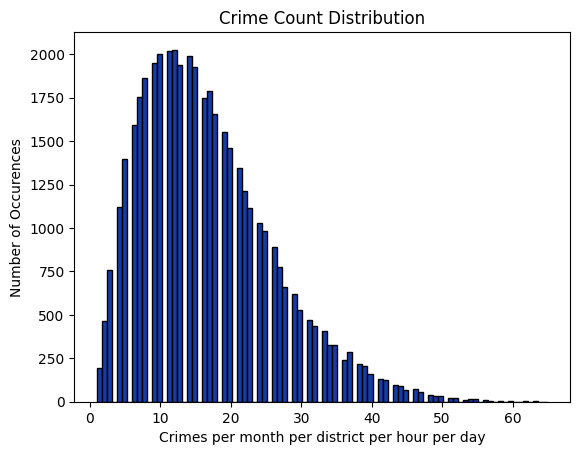

In [25]:
# Crime Count Distribution plot (We need to be using this plot in order to devise our target feature, "Alarm")

plt.hist(x='Crime_Count', data=cri6,bins=90,linewidth=1,edgecolor='black', color='#163ca9')
#plt.title("Distribution of Crimes in Chicago", fontfamily="Agency FB", fontsize=25)
plt.xlabel("Crimes per month per district per hour per day")
plt.ylabel("Number of Occurences")
plt.title("Crime Count Distribution")
plt.savefig("../results/plots/Distribution of crimes.png")

In [26]:
# 0-9 : Low Crime Rate
# 10-23 : Medium Crime Rate
# 24 and above : High Crime Rate

### The above ranges can be made better with the help of a crime analyst. As of now, we have used an intuitive way
### of generating classifications for our target feature; based on aproximating the distribution of the crime counts
### as a Normal curve

# Feature Engineer the above dataset
def crime_rate_assign(x):
    if(x<=9):
        return 0
    elif(x>9 and x<=23):
        return 1
    else:
        return 2
cri6['Alarm'] = cri6['Crime_Count'].apply(crime_rate_assign)
cri6 = cri6[['Month','Day','Hour','District','Crime_Count','Alarm']]    
cri6.head()

,Month,Day,Hour,District,Crime_Count,Alarm
22154,6,6,15,25,12,1
16358,5,2,19,25,16,1
15827,5,1,15,25,13,1
15828,5,1,16,25,26,2
15829,5,1,17,25,22,1


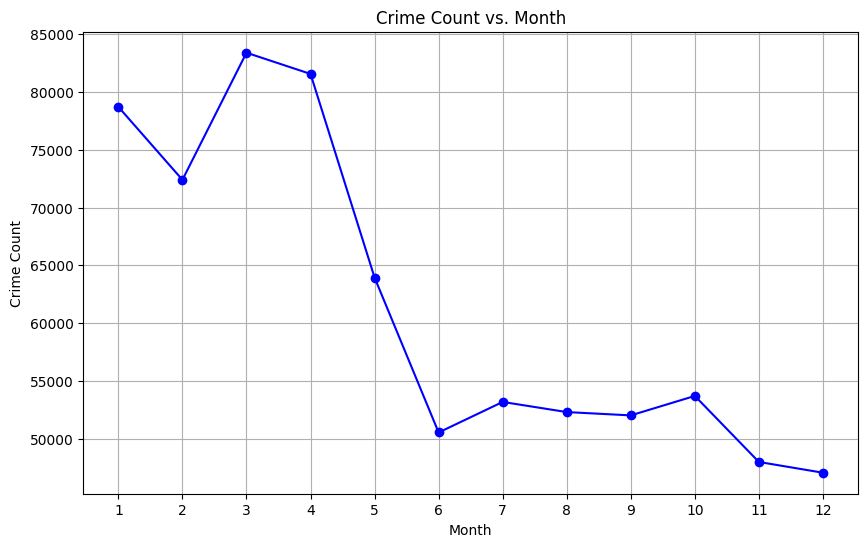

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by Month and sum the Crime_Count
crime_count_by_month = cri6.groupby("Month")["Crime_Count"].sum().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(crime_count_by_month["Month"], crime_count_by_month["Crime_Count"], marker='o', linestyle='-', color='b')
ax.set_title('Crime Count vs. Month')
ax.set_xlabel('Month')
ax.set_ylabel('Crime Count')
ax.set_xticks(crime_count_by_month["Month"])
ax.grid(True)

# Show the plot
plt.show()

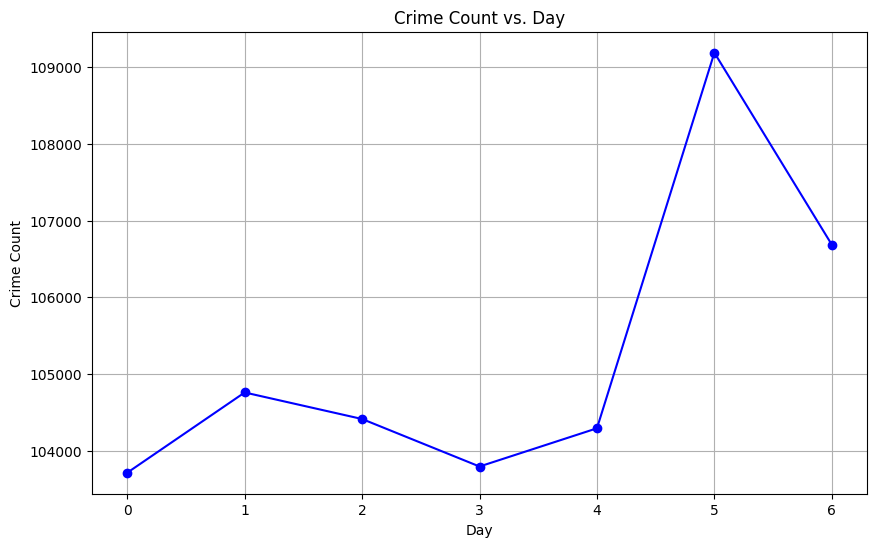

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by Day and sum the Crime_Count
crime_count_by_Day = cri6.groupby("Day")["Crime_Count"].sum().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(crime_count_by_Day["Day"], crime_count_by_Day["Crime_Count"], marker='o', linestyle='-', color='b')
ax.set_title('Crime Count vs. Day')
ax.set_xlabel('Day')
ax.set_ylabel('Crime Count')
ax.set_xticks(crime_count_by_Day["Day"])
ax.grid(True)

# Show the plot
plt.show()

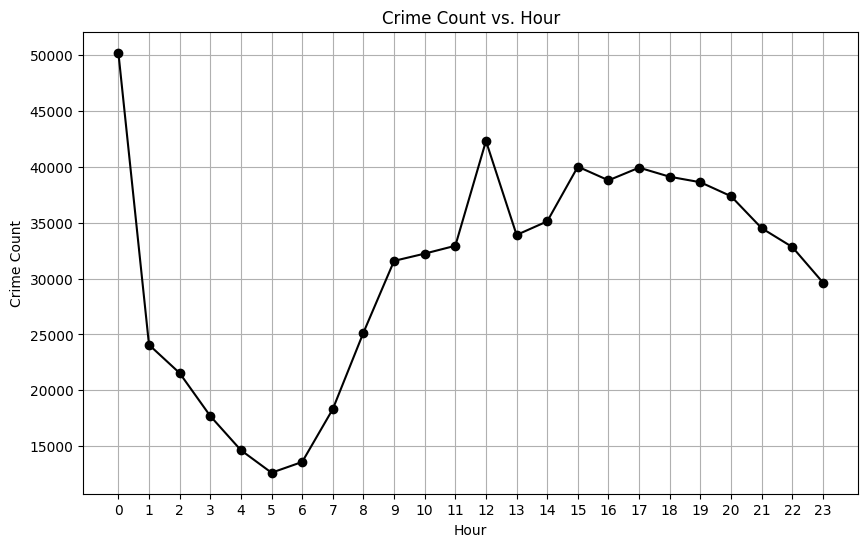

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by Hour and sum the Crime_Count
crime_count_by_hour = cri6.groupby("Hour")["Crime_Count"].sum().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(crime_count_by_hour["Hour"], crime_count_by_hour["Crime_Count"], marker='o', linestyle='-', color='#000000')
ax.set_title('Crime Count vs. Hour')
ax.set_xlabel('Hour')
ax.set_ylabel('Crime Count')
ax.set_xticks(crime_count_by_hour["Hour"])
ax.grid(True)

# Show the plot
plt.show()

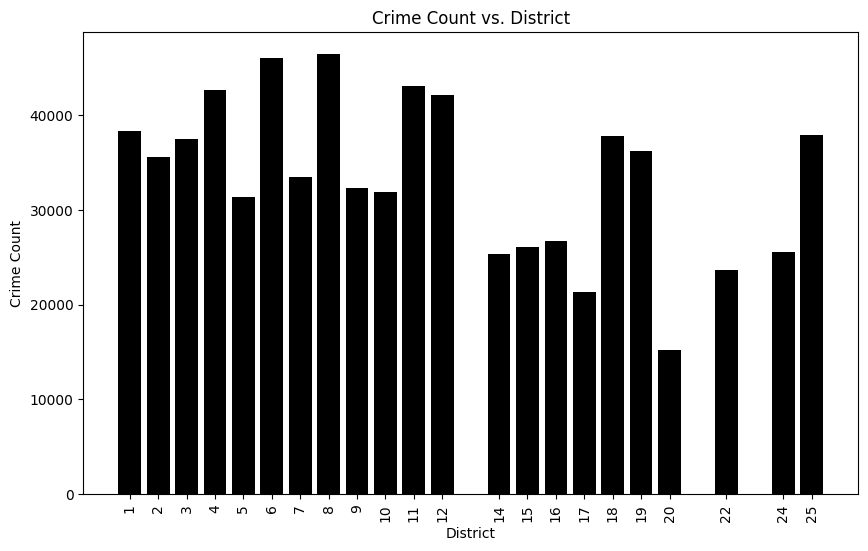

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'cri6' is your DataFrame and it contains 'District' and 'Crime_Count' columns
# Group by District and sum the Crime_Count
crime_count_by_district = cri6.groupby("District")["Crime_Count"].sum().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(crime_count_by_district["District"], crime_count_by_district["Crime_Count"], color='#000000')
ax.set_title('Crime Count vs. District')
ax.set_xlabel('District')
ax.set_ylabel('Crime Count')
ax.set_xticks(crime_count_by_district["District"])

# Rotate x-axis labels if necessary
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [31]:
# To store the above dataset as a csv file
cri6.to_csv("../data/Crime_Compress.csv")

In [32]:
cri6.shape

(44308, 6)

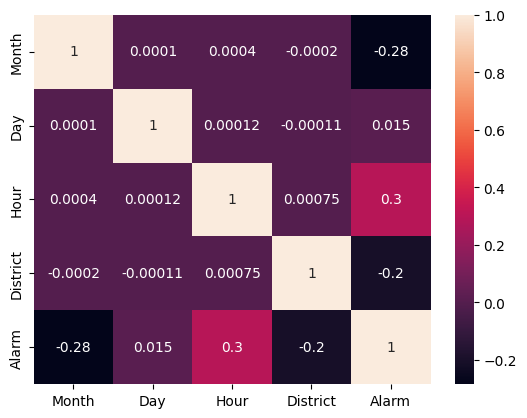

In [33]:
# Correlation heatmap

temp = cri6[['Month', 'Day', 'Hour', 'District', 'Alarm']]
sns.heatmap(temp.corr(), annot=True)
#plt.title("Checking!", fontsize=17)
plt.savefig("../results/plots/Correlation.png")

There is **No strong** correlation

## How good is our generated dataset for classification?

In [34]:
# Let's check how good our data is for classification
cri6['Alarm'].value_counts()

Alarm
1    23784
0    11093
2     9431
Name: count, dtype: int64

In [35]:
print("Low Crime Rate Percentage:", round(cri6['Alarm'].value_counts()[0]/cri6['Alarm'].value_counts().sum()*100,2))
print("Medium Crime Rate Percentage:", round(cri6['Alarm'].value_counts()[1]/cri6['Alarm'].value_counts().sum()*100,2))
print("High Crime Rate Percentage:", round(cri6['Alarm'].value_counts()[2]/cri6['Alarm'].value_counts().sum()*100.2))

Low Crime Rate Percentage: 25.04
Medium Crime Rate Percentage: 53.68
High Crime Rate Percentage: 21


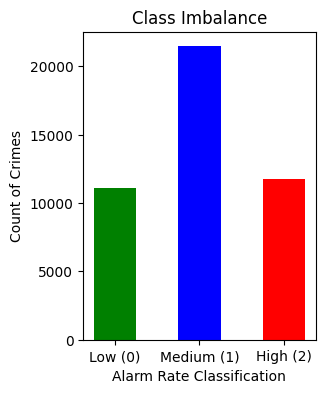

In [36]:
# Plotting the Imbalance

x=['Low (0)','Medium (1)','High (2)']
y=[11093, 21457,11758]
fig, ax = plt.subplots(figsize=(3, 4))
plt.bar(x,y, color=['green', 'blue', 'red'], width=0.5)
# plt.title('THE IMBALANCE IN THE DATASET')
plt.xlabel('Alarm Rate Classification')
plt.ylabel('Count of Crimes')
plt.title("Class Imbalance")
plt.savefig("../results/plots/imbalance.png")

In [37]:
'''Creating the Oversampled balanced dataset'''

from sklearn.utils import resample # for upsampling

# Set individual classes
cri6_low = cri6[cri6['Alarm']==0]
cri6_medium = cri6[cri6['Alarm']==1]
cri6_high = cri6[cri6['Alarm']==2]

# Upsample the minority classes to size of class 1 (medium)
cri6_low_upsampled = resample(cri6_low, 
                                 replace=True,     # sample with replacement
                                 n_samples=22640,    # to match majority class
                                 random_state=101) 

cri6_high_upsampled = resample(cri6_high, 
                                 replace=True,     # sample with replacement
                                 n_samples=22640,    # to match majority class
                                 random_state=101)

# Combine majority class with upsampled minority class
cri6_upsampled = pd.concat([cri6_medium, cri6_low_upsampled, cri6_high_upsampled])

## Modeling the problem as a Machine Learning Task

##### Training Samples
* 75% of the 2019,2021-2024 data

##### Testing Samples
1. 25% of the 2019,2021-2024 data 


#### Supporting Functions

In [38]:
from sklearn.metrics import recall_score

def calculate_uar(y_test, y_pred):
    # Compute recall for each class
    recalls = recall_score(y_test, y_pred, average=None)

    # Compute UAR
    uar = recalls.mean()
    print("Unweighted Average Recall (UAR):", uar)
    return 

## The Modelling 

### Algorithm 1 : Decision Trees

In [39]:
# Using Decision Trees for classification 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels

X = cri6[['Month', 'Day', 'Hour', 'District']] # independent
y = cri6['Alarm'] # dependent

# Let's split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101) # 75:25 split

# print(X_train)
# print('hi')
# print(X_test)
# Creating tree
d_tree = DecisionTreeClassifier(random_state=101)
# Fitting tree
d_tree = d_tree.fit(X_train, y_train)
# Predicting !
y_pred = d_tree.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)

print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

uar = calculate_uar(y_test, y_pred)

print("Unweighted Average Recall (UAR):", uar)


Accuracy: 67.24744967048841 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1     2
Actual Alarm                     
0                1803   928    18
1                 992  4143   854
2                  14   822  1503

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.66      0.65      2749
           1       0.70      0.69      0.70      5989
           2       0.63      0.64      0.64      2339

    accuracy                           0.67     11077
   macro avg       0.66      0.66      0.66     11077
weighted avg       0.67      0.67      0.67     11077

Unweighted Average Recall (UAR): 0.6634084684972031
Unweighted Average Recall (UAR): None


In [40]:
# # Let's try with KFold cross validation
# from sklearn.model_selection import StratifiedKFold
# skf = StratifiedKFold(n_splits=100, shuffle=False)

# X = cri6.iloc[:,0:4].values
# y = cri6.iloc[:,5].values

# i=1
# scores = []
# for train_index, test_index in skf.split(X, y):
#     #print('{} of KFold {}'.format(i,skf.n_splits))
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     d_tree = DecisionTreeClassifier(random_state=101)
#     # Fitting tree
#     d_tree = d_tree.fit(X_train, y_train)
#     # Predicting !
#     y_pred = d_tree.predict(X_test)
    
#     # Model Evaluation
#     # print(y_test)
#     # print(y_pred)
#     scores.append(metrics.accuracy_score(y_test, y_pred)*100)
#     #print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# # Accuracy
# print("Accuracy:",np.mean(scores),"\n")   

# # Confusion Matrix for evaluating the model
# cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
# print("\n----------Confusion Matrix------------------------------------")
# print(cm)

# # Classification Report
# print("\n----------Classification Report------------------------------------")
# print(classification_report(y_test,y_pred))

# #unweighted average recall
# uar = calculate_uar(y_test, y_pred)

# print("Unweighted Average Recall (UAR):", uar)

### Algorithm 2 : Random Forest

In [41]:
# # Using Random Forest for classification 

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix
# import joblib

# X = cri6.iloc[:,0:4].values
# y = cri6.iloc[:,5].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# #scaler = StandardScaler()
# #X_train = scaler.fit_transform(X_train)
# #X_test = scaler.transform(X_test)

# rf_classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 101)
# rf_classifier.fit(X_train, y_train)

# y_pred = rf_classifier.predict(X_test)

# print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
# print("\n----------Confusion Matrix------------------------------------")
# print(cm)

# # Classification Report
# print("\n----------Classification Report------------------------------------")
# print(classification_report(y_test,y_pred))

# #unweighted average recall
# uar = calculate_uar(y_test, y_pred)

# print("Unweighted Average Recall (UAR):", uar)

In [42]:
# # Using Random Forest for classification (using k-fold)

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix
# import joblib

# X = cri6.iloc[:,0:4].values
# y = cri6.iloc[:,5].values

# scores = []
# for train_index, test_index in skf.split(X, y):
#     #print('{} of KFold {}'.format(i,skf.n_splits))
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 101)
#     classifier.fit(X_train, y_train)

#     y_pred = classifier.predict(X_test)
    
#     # Model Evaluation
#     # print(y_test)
#     # print(y_pred)
#     scores.append(metrics.accuracy_score(y_test, y_pred)*100)
#     #print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# #scaler = StandardScaler()
# #X_train = scaler.fit_transform(X_train)
# #X_test = scaler.transform(X_test)

# # Accuracy
# print("Accuracy:",np.mean(scores),"\n") 

# cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
# print("\n----------Confusion Matrix------------------------------------")
# print(cm)

# # Classification Report
# print("\n----------Classification Report------------------------------------")
# print(classification_report(y_test,y_pred))

# #unweighted average recall
# uar = calculate_uar(y_test, y_pred)

# print("Unweighted Average Recall (UAR):", uar)

### Algorithm 3 : KNN Classifier

In [43]:
# # KNN Classifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import metrics
# from sklearn.model_selection import train_test_split

# X = cri6.iloc[:,0:4].values
# y = cri6.iloc[:,5].values

# # Let's split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # 75:25 split

# '''We need to decide the optimal value for k. So, let us do that.'''
# k_vals = range(1,30)
# acc = []
# for k in k_vals:
#     knn = KNeighborsClassifier(n_neighbors = k)
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
#     acc.append(metrics.accuracy_score(y_test, y_pred))
# # plot the graph
# plt.plot(k_vals,acc)
# plt.xlabel('Value of k')
# plt.ylabel('Accuracy')
# plt.title('Choosing k value for KNN Algorithm')

In [44]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

X = cri6.iloc[:,0:4].values
y = cri6.iloc[:,5].values

# Let's split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101) # 75:25 split

# Choosing k as 5 (Seems to be the best value)
knn1 = KNeighborsClassifier(n_neighbors = 5)
knn1.fit(X_train, y_train)
y_pred = knn1.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)
print('KNN Classifier on the imbalanced dataset itself')
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

#unweighted average recall
uar = calculate_uar(y_test, y_pred)

print("Unweighted Average Recall (UAR):", uar)

KNN Classifier on the imbalanced dataset itself
Accuracy: 72.47449670488399 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1     2
Actual Alarm                     
0                1904   845     0
1                 778  4705   506
2                  13   907  1419

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      2749
           1       0.73      0.79      0.76      5989
           2       0.74      0.61      0.67      2339

    accuracy                           0.72     11077
   macro avg       0.72      0.69      0.71     11077
weighted avg       0.72      0.72      0.72     11077

Unweighted Average Recall (UAR): 0.6949639864998493
Unweighted Average Recall (UAR): None


In [45]:
# '''KNN Classifier on itself - Using k-fold validation'''
# # KNN Classifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import metrics
# from sklearn.model_selection import train_test_split

# X = cri6.iloc[:,0:4].values
# y = cri6.iloc[:,5].values

# scores = []
# for train_index, test_index in skf.split(X, y):
#     #print('{} of KFold {}'.format(i,skf.n_splits))
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     # Choosing k as 5 (Seems to be the best value)
#     knn = KNeighborsClassifier(n_neighbors = 5)
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
#     # Model Evaluation
#     # print(y_test)
#     # print(y_pred)
#     scores.append(metrics.accuracy_score(y_test, y_pred)*100)
#     #print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")


# # Model Evaluation
# # print(y_test)
# # print(y_pred)
# print('KNN Classifier on the imbalanced dataset itself')
# print("Accuracy:",(np.mean(scores)),"\n")

# # Confusion Matrix for evaluating the model
# cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
# print("\n----------Confusion Matrix------------------------------------")
# print(cm)

# # Classification Report
# print("\n----------Classification Report------------------------------------")
# print(classification_report(y_test,y_pred))

# #unweighted average recall
# uar = calculate_uar(y_test, y_pred)
# print("Unweighted Average Recall (UAR):", uar)

# ##################################################################################################

# '''KNN Classifier on the upsampled dataset'''
# X = cri6_upsampled.iloc[:,0:4].values
# y = cri6_upsampled.iloc[:,5].values

# scores = []
# for train_index, test_index in skf.split(X, y):
#     #print('{} of KFold {}'.format(i,skf.n_splits))
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     # Choosing k as 5 (Seems to be the best value)
#     knn = KNeighborsClassifier(n_neighbors = 5)
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
#     # Model Evaluation
#     # print(y_test)
#     # print(y_pred)
#     scores.append(metrics.accuracy_score(y_test, y_pred)*100)
#     #print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# # Model Evaluation
# # print(y_test)
# # print(y_pred)
# print('\n\nKNN Classifier on the upsampled dataset')
# print("Accuracy:",(np.mean(scores)),"\n")

# # Confusion Matrix for evaluating the model
# cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
# print("\n----------Confusion Matrix------------------------------------")
# print(cm)

# # Classification Report
# print("\n----------Classification Report------------------------------------")
# print(classification_report(y_test,y_pred))

# #unweighted average recall
# uar = calculate_uar(y_test, y_pred)
# print("Unweighted Average Recall (UAR):", uar)

SVM : https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

### Algorithm 4 : SVM

In [46]:
# from sklearn import svm, metrics
# from sklearn.model_selection import train_test_split
# import pandas as pd

# # Assuming cri6 is already created and loaded with data
# # Balanced dataset with oversampling
# X = cri6.iloc[:, 0:4].values
# y = cri6.iloc[:, 5].values

# # Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)  # 75:25 split

# # Create an SVM classifier with a linear kernel
# clf = svm.SVC(kernel='linear')

# # Train the model using the training sets
# clf.fit(X_train, y_train)

# # Predict the response for the test dataset
# y_pred = clf.predict(X_test)

# # Model Evaluation
# print("SVM with oversampled balanced dataset")
# print("Accuracy:", metrics.accuracy_score(y_test, y_pred) * 100, "\n")

# # Confusion Matrix for evaluating the model
# labels = sorted(list(set(y_test) | set(y_pred)))  # Ensure all labels are included
# cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'], dropna=False, margins=True)

# print("\n----------Confusion Matrix------------------------------------")
# print(cm)

# # Classification Report
# print("\n----------Classification Report------------------------------------")
# print(metrics.classification_report(y_test, y_pred))

# # Unweighted Average Recall (UAR)
# uar = 0
# for label in labels:
#     if label in cm.index and label in cm.columns:
#         uar += cm.at[label, label] / cm.loc[:, label].sum()
# uar /= len(labels)

# print("\nUAR ->", uar)


### Algorithm 5 : Logistic Regression

In [47]:
# # Logistic Regression 
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# import numpy as np

# X = cri6.iloc[:,0:4].values
# y = cri6.iloc[:,5].values

# # Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101) # 75:25 split

# logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# # Create an instance of Logistic Regression Classifier and fit the data.
# logreg.fit(X_train, y_train)

# # Predict the response for test dataset
# y_pred = logreg.predict(X_test)

# # Model Evaluation
# print("Logistic Regression with imbalanced dataset")
# print("Accuracy:", (metrics.accuracy_score(y_test, y_pred) * 100), "\n")

# # Confusion Matrix for evaluating the model
# cm = confusion_matrix(y_test, y_pred)

# print("\n----------Confusion Matrix------------------------------------")
# print(pd.DataFrame(cm, index=['Actual Alarm 0', 'Actual Alarm 1', 'Actual Alarm 2'],
#                    columns=['Predicted Alarm 0', 'Predicted Alarm 1', 'Predicted Alarm 2']))

# # Classification Report
# print("\n----------Classification Report------------------------------------")
# print(classification_report(y_test, y_pred))

# # Unweighted Average Recall (UAR)
# recall_per_class = []
# for i in range(len(cm)):
#     recall = cm[i, i] / cm[i].sum()
#     recall_per_class.append(recall)

# uar = np.mean(recall_per_class)
# print("\nUAR ->", uar)

In [48]:
# # Logistic Regression (k fold)
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn import metrics

# X = cri6.iloc[:,0:4].values
# y = cri6.iloc[:,5].values

# scores = []
# for train_index, test_index in skf.split(X, y):
#     #print('{} of KFold {}'.format(i,skf.n_splits))
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     # Choosing k as 5 (Seems to be the best value)
#     logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

#     # Create an instance of Logistic Regression Classifier and fit the data.
#     logreg.fit(X_train, y_train)

#     #Predict the response for test dataset
#     y_pred = logreg.predict(X_test)
#     # Model Evaluation
#     # print(y_test)
#     # print(y_pred)
#     scores.append(metrics.accuracy_score(y_test, y_pred)*100)
#     #print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# # Model Evaluation
# # print(y_test)
# # print(y_pred)
# print("Logistic Regression with imbalanced dataset")
# print("Accuracy:",(np.mean(scores)),"\n")

# # Confusion Matrix for evaluating the model
# cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
# print("\n----------Confusion Matrix------------------------------------")
# print(cm)

# # Classification Report
# print("\n----------Classification Report------------------------------------")
# print(classification_report(y_test,y_pred))

# #unweighted average recall
# uar = calculate_uar(y_test, y_pred)
# print("Unweighted Average Recall (UAR):", uar)

### Algorithm 6 : Gradient Boosting Tree

In [49]:
# Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = cri6.iloc[:,0:4].values
y = cri6.iloc[:,5].values

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1) # 75:25 split

gbc_1 = GradientBoostingClassifier(n_estimators=1000)
gbc_1.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gbc_1.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)
print("Gradient Boosting with imbalanced dataset")
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

#unweighted average recall
uar = calculate_uar(y_test, y_pred)
print("Unweighted Average Recall (UAR):", uar)

Gradient Boosting with imbalanced dataset
Accuracy: 77.59321115825585 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1     2
Actual Alarm                     
0                1947   806     1
1                 533  4980   428
2                   0   714  1668

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.71      0.74      2754
           1       0.77      0.84      0.80      5941
           2       0.80      0.70      0.74      2382

    accuracy                           0.78     11077
   macro avg       0.78      0.75      0.76     11077
weighted avg       0.78      0.78      0.77     11077

Unweighted Average Recall (UAR): 0.7484887622698243
Unweighted Average Recall (UAR): None


In [55]:
# Gradient Boosting with balanced dataset
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = cri6_upsampled.iloc[:,0:4].values
y = cri6_upsampled.iloc[:,5].values

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1) # 75:25 split

gbc_2 = GradientBoostingClassifier(n_estimators=1000)
gbc_2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gbc_2.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)
print("Gradient Boosting with imbalanced dataset")
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))



Gradient Boosting with imbalanced dataset
Accuracy: 78.53005907564 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1     2
Actual Alarm                     
0                4714   873     7
1                 961  4153   943
2                   4   919  4692

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      5594
           1       0.70      0.69      0.69      6057
           2       0.83      0.84      0.83      5615

    accuracy                           0.79     17266
   macro avg       0.79      0.79      0.79     17266
weighted avg       0.78      0.79      0.78     17266



ValueError: Must pass 2-d input. shape=(1, 3, 3)

In [50]:
# import pandas as pd
# from sklearn.tree import export_graphviz
# import graphviz

# # Visualize the first tree in the Gradient Boosting Classifier
# estimator = gbc_1.estimators_[0, 0]  # The first tree of the first stage
# dot_data = export_graphviz(estimator, feature_names=cri6.columns[0:4], filled=True, rounded=True, special_characters=True)
    
# # Example rendering
# dot = graphviz.Source(dot_data)
# dot.render(format='png').replace('\\', '/')
# dot.render(outfile='gradient_boosting_tree.svg').replace('\\', '/')



# # graph = graphviz.Source(dot_data)
# # graph.render("./gradient_boosting_tree")  # Save the visualization to a file
# # graph.view()  # View the visualization

# dot.view()

### SAVE MODEL

In [51]:
# import joblib

# # Save the model to a file
# joblib.dump(gbc_1, 'gradient_boosting_model.joblib')

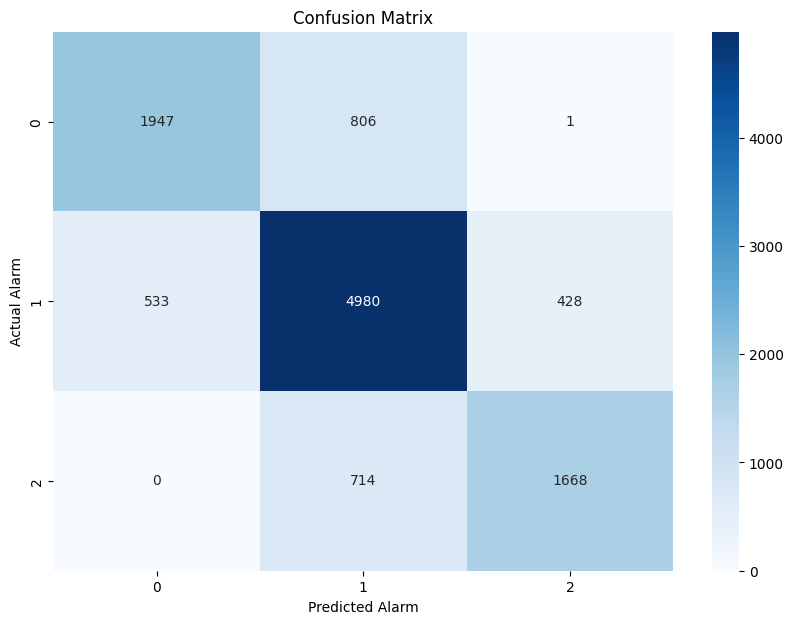

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create the confusion matrix as a numpy array
confusion_matrix = np.array([[1947, 806, 1],
                             [533, 4980, 428],
                             [0, 714, 1668]])

# Define the labels
labels = ['0', '1', '2']

# Create a dataframe for the confusion matrix
df_cm = pd.DataFrame(confusion_matrix, index=labels, columns=labels)

# Set the figure size
plt.figure(figsize=(10, 7))

# Plot the heatmap
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", cbar=True)

# Add labels to the plot
plt.xlabel('Predicted Alarm')
plt.ylabel('Actual Alarm')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


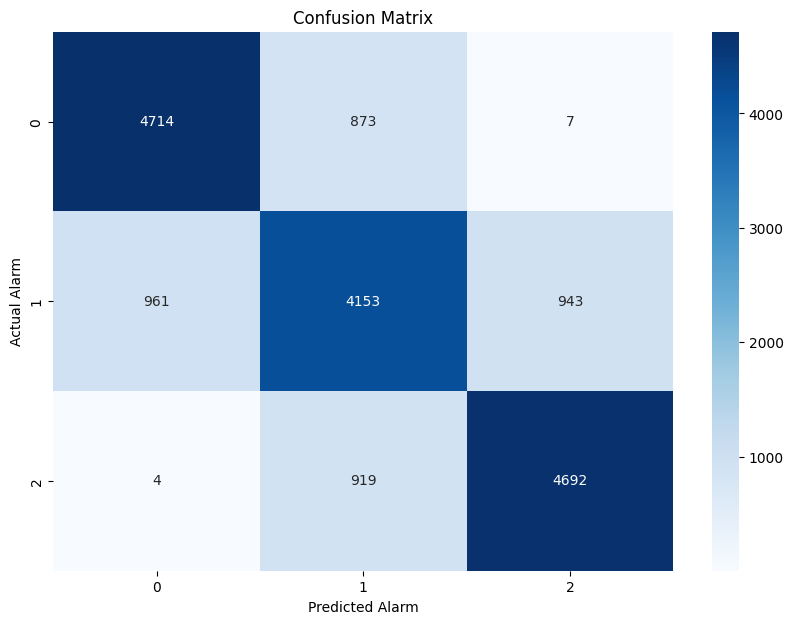

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create the confusion matrix as a numpy array
confusion_matrix = np.array([[4714,873,7],
                         [961,4153 ,943],
                         [4,919 ,4692]])

# Define the labels
labels = ['0', '1', '2']

# Create a dataframe for the confusion matrix
df_cm = pd.DataFrame(confusion_matrix, index=labels, columns=labels)

# Set the figure size
plt.figure(figsize=(10, 7))

# Plot the heatmap
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", cbar=True)

# Add labels to the plot
plt.xlabel('Predicted Alarm')
plt.ylabel('Actual Alarm')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

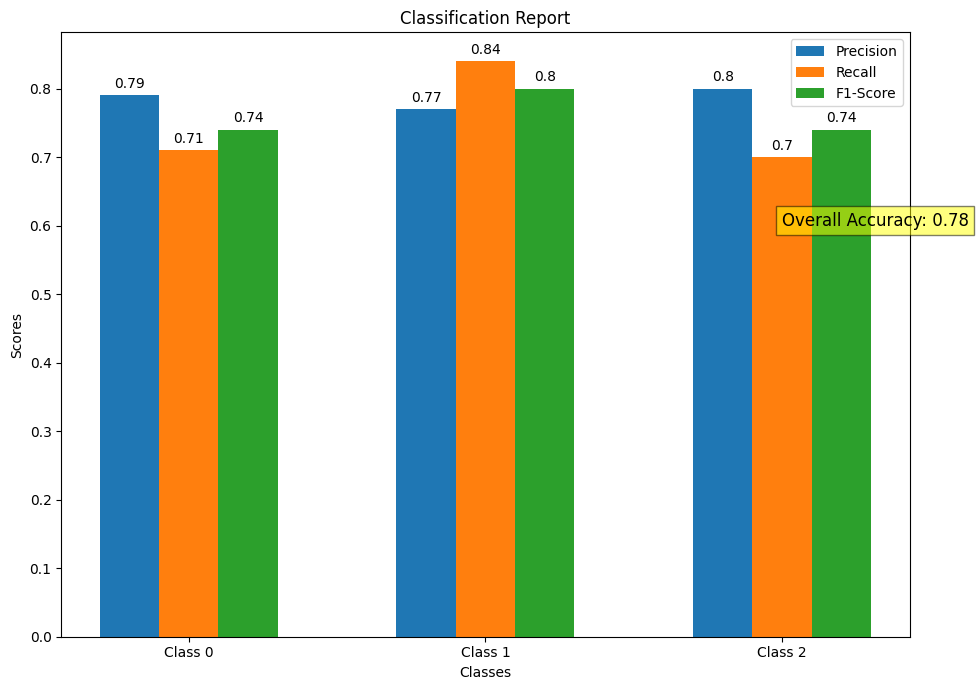

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the classification report
classes = ['Class 0', 'Class 1', 'Class 2']
precision = [0.79, 0.77, 0.80]
recall = [0.71, 0.84, 0.70]
f1_score = [0.74, 0.80, 0.74]
support = [2754, 5941, 2382]
accuracy = 0.78

x = np.arange(len(classes))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 7))

# Plotting precision, recall, and f1-score bars
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Report')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Attach a text label above each bar in rects1, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Display overall accuracy
plt.text(2, 0.6, f'Overall Accuracy: {accuracy}', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))

fig.tight_layout()

plt.show()
